# Chapter: Support Vector Machines & Kernel Methods


# Topic: SVR model with polymer pilot plant data

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
data = np.loadtxt('debutanizer_data.txt', skiprows=5)

In [3]:
# separate train and test data
from sklearn.model_selection import train_test_split
X = data[:,0:-1]
y = data[:,-1][:,np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [4]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train_normal = X_scaler.fit_transform(X_train)
X_test_normal = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_normal = y_scaler.fit_transform(y_train)
y_test_normal = y_scaler.transform(y_test)

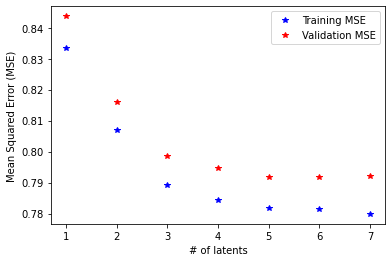

In [6]:
# Finding # latents using kFold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

scaler = StandardScaler()

fit_MSE = []
validate_MSE = []
for n_comp in range(1,8):
    local_fit_MSE = []
    local_validate_MSE = []
    
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 100)
    for fit_index, validate_index in kfold.split(y_train):
        X_fit_normal = scaler.fit_transform(X_train[fit_index])
        X_validate_normal = scaler.transform(X_train[validate_index])
        
        y_fit_normal = scaler.fit_transform(y_train[fit_index])
        y_validate_normal = scaler.transform(y_train[validate_index])
        
        pls = PLSRegression(n_components = n_comp)
        pls.fit(X_fit_normal, y_fit_normal)
        
        local_fit_MSE.append(mean_squared_error(y_fit_normal, pls.predict(X_fit_normal)))
        local_validate_MSE.append(mean_squared_error(y_validate_normal, 
                                                        pls.predict(X_validate_normal)))
    
    fit_MSE.append(np.mean(local_fit_MSE))
    validate_MSE.append(np.mean(local_validate_MSE))


# plot
plt.figure()
plt.plot(range(1,8), fit_MSE, 'b*', label = 'Training MSE')
plt.plot(range(1,8), validate_MSE, 'r*', label = 'Validation MSE')
plt.xticks(range(1,8))
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('# of latents')
plt.legend()
plt.show()

In [ ]:
# plots of raw and predicted data
plt.figure()
plt.plot(y_train, 'b',  label = 'Raw data')
plt.plot(y_train_predicted, 'r', label = 'SVR prediction')
plt.ylabel('C4 content (training data)')
plt.xlabel('Sample #')
plt.legend()
plt.show()

plt.figure()
plt.plot(y_test, 'b',  label = 'Raw data')
plt.plot(y_test_predicted, 'r',  label = 'SVR prediction')
plt.ylabel('C4 content (test data)')
plt.xlabel('Sample #')
plt.legend()
plt.show()

plt.figure()
plt.plot(y_train, y_train_predicted, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_train, y_train, '-r', linewidth=0.5)
plt.xlabel('C4 content (raw training data)')
plt.ylabel('C4 content (prediction)')
plt.show()

plt.figure()
plt.plot(y_test, y_test_predicted, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_test, y_test, '-r', linewidth=0.5)
plt.xlabel('C4 content (raw test data)')
plt.ylabel('C4 content (prediction)')
plt.show()

In [7]:
# build PLS model
pls = PLSRegression(n_components = 5)
pls.fit(X_train_normal, y_train_normal)

PLSRegression(n_components=5)

In [8]:
# check training vs test accuracy
print('Accuracy over training data: ', pls.score(X_train_normal, y_train_normal))
print('Accuracy over test data: ', pls.score(X_test_normal, y_test_normal))

Accuracy over training data:  0.2179006054284014
Accuracy over test data:  0.1882053961720188


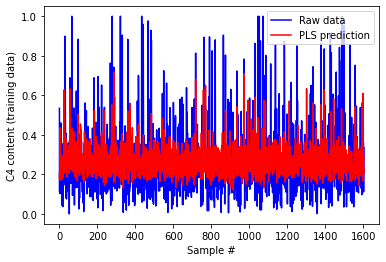

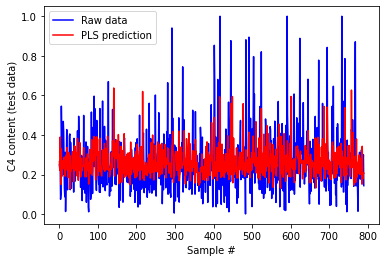

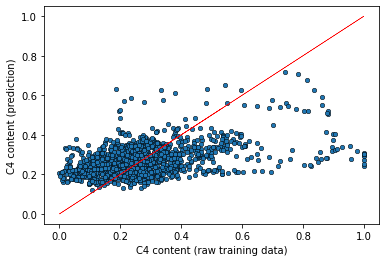

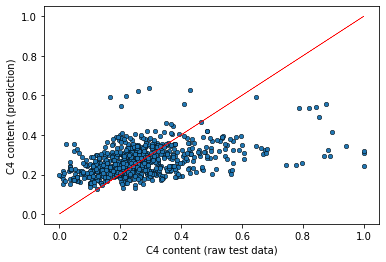

In [9]:
# plots of raw and predicted data
y_train_normal_predict = pls.predict(X_train_normal)
y_test_normal_predict = pls.predict(X_test_normal)

y_train_predict = y_scaler.inverse_transform(y_train_normal_predict)
y_test_predict = y_scaler.inverse_transform(y_test_normal_predict)


plt.figure()
plt.plot(y_train, 'b',  label = 'Raw data')
plt.plot(y_train_predict, 'r', label = 'PLS prediction')
plt.ylabel('C4 content (training data)')
plt.xlabel('Sample #')
plt.legend()
plt.show()

plt.figure()
plt.plot(y_test, 'b',  label = 'Raw data')
plt.plot(y_test_predict, 'r',  label = 'PLS prediction')
plt.ylabel('C4 content (test data)')
plt.xlabel('Sample #')
plt.legend()
plt.show()

plt.figure()
plt.plot(y_train, y_train_predict, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_train, y_train, '-r', linewidth=0.5)
plt.xlabel('C4 content (raw training data)')
plt.ylabel('C4 content (prediction)')
plt.show()

plt.figure()
plt.plot(y_test, y_test_predict, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_test, y_test, '-r', linewidth=0.5)
plt.xlabel('C4 content (raw test data)')
plt.ylabel('C4 content (prediction)')
plt.show()